<a href="https://colab.research.google.com/github/martinpius/RNN-ALIENS/blob/main/The_RNN_reloaded.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount = True)
try:
  COLAB = True
  import tensorflow as tf
  print(f"You are using Google colaboratory with tensorflow version: {tf.__version__}")
except Exception as e:
  COLAB = FALSE
  print(f"{type(e)} {e}\n...Please Load Your Drive...")

def time_fmt(x):
  h = int(x / (60 * 60))
  m = int(x % (60 * 60) / 60)
  s = int(x % 60)
  return f"{h}: {m:>03}: {s:>05.2f}"

time_fmt(124.1718)

Mounted at /content/drive
You are using Google colaboratory with tensorflow version: 2.4.0


'0: 002: 04.00'

In [2]:
#The RNN has been useful in learning patterns in a sequence data or time-series data
#Great achievement is seen in text, video and music generations, machine translation and time series forecasting
#Many other applications can also be done using RNN eg survival prediction etc

In [3]:
#The RNN cell uses a for loop to repeat over a number of times while maintaining the internal state of the cell
#that hold the informations derived from the previous step

In [4]:
#The simple LSTM layer (inbuilt):
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


Model: "rnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1000)]            0         
_________________________________________________________________
embedding (Embedding)        (None, 1000, 64)          64000     
_________________________________________________________________
LSTM (LSTM)                  (None, 64)                33024     
_________________________________________________________________
reshape (Reshape)            (None, 8, 8)              0         
_________________________________________________________________
lstm (LSTM)                  (None, 128)               70144     
_________________________________________________________________
dense1 (Dense)               (None, 1024)              132096    
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0       

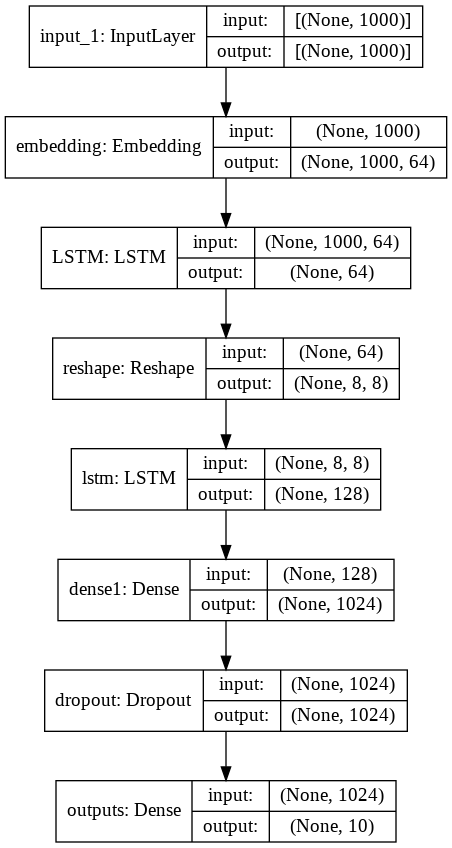

In [5]:
inputs = tf.keras.Input(shape = (1000,))
x = tf.keras.layers.Embedding(input_dim = 1000, output_dim = 64, name = 'embedding')(inputs)
x = tf.keras.layers.LSTM(units = 64, name = 'LSTM')(x)
x = tf.keras.layers.Reshape((8,8))(x)
x = tf.keras.layers.LSTM(units = 128)(x)
x = tf.keras.layers.Dense(units = 1024, activation = 'relu', name = 'dense1')(x)
x = tf.keras.layers.Dropout(rate = 0.5, name = 'dropout')(x)
outputs = tf.keras.layers.Dense(units = 10, activation = 'softmax', name = 'outputs')(x)
model = tf.keras.Model(inputs = inputs, outputs = outputs, name = 'rnn')
model.summary()
tf.keras.utils.plot_model(model = model, to_file = 'rnn_simple.png', show_shapes = True)


In [6]:
#Returning output at every timestep for each sample.

Model: "simple_rnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 10000)]           0         
_________________________________________________________________
embedding (Embedding)        (None, 10000, 100)        1000000   
_________________________________________________________________
LSTM_1 (LSTM)                (None, 10000, 128)        117248    
_________________________________________________________________
LSTM_2 (LSTM)                (None, 10000, 64)         49408     
_________________________________________________________________
RNN (SimpleRNN)              (None, 10000, 1024)       1115136   
_________________________________________________________________
dense_layer (Dense)          (None, 10000, 1024)       1049600   
_________________________________________________________________
dropout (Dropout)            (None, 10000, 1024)       0

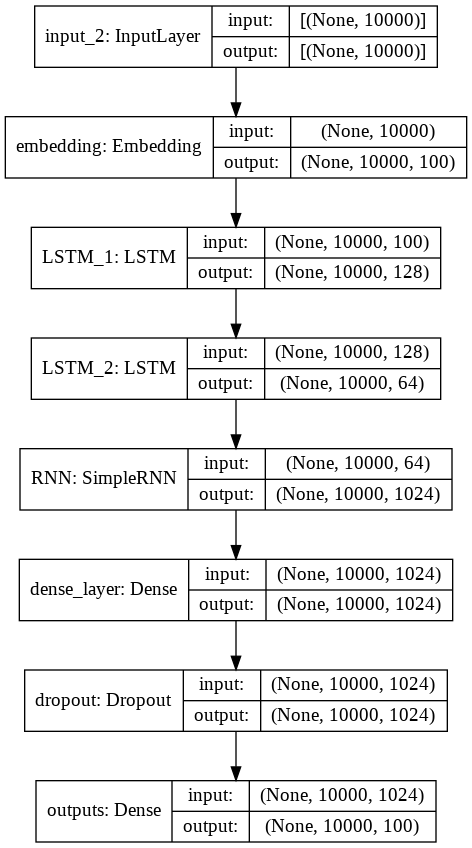

In [7]:
inputs = tf.keras.Input(shape = (10000,))
x = tf.keras.layers.Embedding(input_dim = 10000, output_dim = 100, name = 'embedding')(inputs)
x = tf.keras.layers.LSTM(units = 128, 
                         kernel_initializer = 'random_normal',
                         recurrent_dropout = 0.5, 
                         dropout = 0.25,return_sequences= True, name = 'LSTM_1')(x)
#x = tf.keras.layers.Reshape((8,16))(x)
x = tf.keras.layers.LSTM(units = 64, 
                         kernel_initializer = 'random_normal',
                         dropout = 0.5, 
                         recurrent_dropout = 0.25, 
                         return_sequences = True, name = 'LSTM_2')(x)
x = tf.keras.layers.SimpleRNN(units = 1024,
                              return_sequences=True,
                              kernel_initializer = 'random_normal',
                              recurrent_dropout = 0.5,
                              dropout = 0.5, name = 'RNN')(x)
x = tf.keras.layers.Dense(units = 1024,
                          kernel_initializer = 'random_normal',
                          activation = 'relu', name = 'dense_layer')(x)
x = tf.keras.layers.Dropout(rate = 0.5, name = 'dropout')(x)
outputs = tf.keras.layers.Dense(units = 100, activation = 'softmax', name = 'outputs')(x)

model = tf.keras.Model(inputs = inputs, outputs = outputs, name = 'simple_rnn')
model.summary()
tf.keras.utils.plot_model(model = model, to_file = 'simple_rnn.png', show_shapes = True)


In [8]:
#Returning the states of the RNN/LSTM/GRU cell for future use.
#The previous states of the GRU/LSTM/simple-RNN can be utilized as initilizers for some layers
#As an example we build a simple autoencoder model for machine translation

Model: "AutoEncoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_shape (InputLayer)      [(None, 1000)]       0                                            
__________________________________________________________________________________________________
encoder_embeding (Embedding)    (None, 1000, 64)     192000      encoder_shape[0][0]              
__________________________________________________________________________________________________
decoder_shape (InputLayer)      [(None, 1000)]       0                                            
__________________________________________________________________________________________________
lstm_1 (LSTM)                   (None, 1000, 64)     33024       encoder_embeding[0][0]           
________________________________________________________________________________________

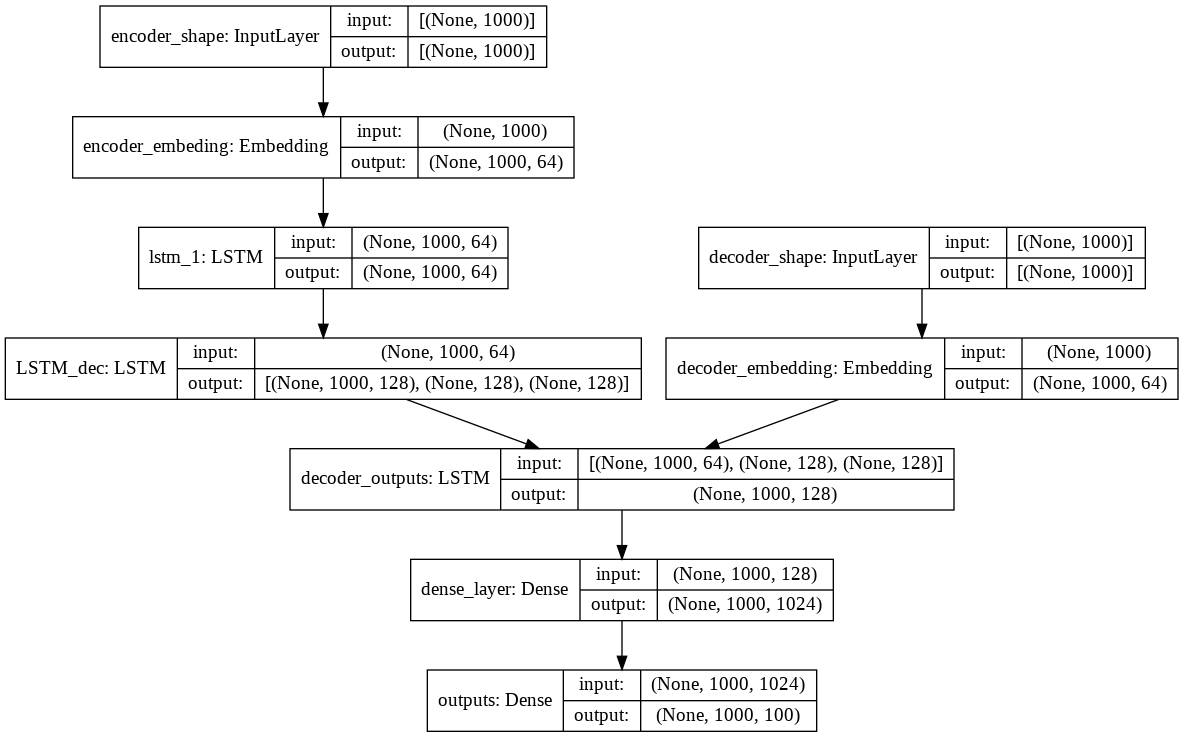

In [9]:
encoder_dim = 3000
decoder_dim = 1000
enc_inputs = tf.keras.Input(shape = (1000,), name = 'encoder_shape')
x = tf.keras.layers.Embedding(input_dim = encoder_dim, 
                              output_dim = 64, 
                              name = 'encoder_embeding')(enc_inputs)
x = tf.keras.layers.LSTM(units = 64, kernel_initializer = 'random_normal',
                         return_sequences = True,dropout = 0.5,
                         recurrent_dropout = 0.25)(x)                              
emb_out, state_h, state_c = tf.keras.layers.LSTM(units = 128, 
                                                 return_state = True,
                                                 dropout = 0.25,
                                                 recurrent_dropout = 0.5,
                                                 kernel_initializer = 'random_normal',
                                                 return_sequences = True,
                                                 name = 'LSTM_dec')(x)
prev_states = [state_h, state_c]
dec_inputs = tf.keras.Input(shape = (1000,), name = 'decoder_shape')
y = tf.keras.layers.Embedding(input_dim = decoder_dim, 
                              output_dim = 64,
                              name = 'decoder_embedding')(dec_inputs)
y = tf.keras.layers.LSTM(units = 128, 
                         return_sequences = True,
                         kernel_initializer = 'random_normal',
                         dropout = 0.5,
                         recurrent_dropout = 0.25,
                         name = 'decoder_outputs')(y, initial_state = prev_states)
y = tf.keras.layers.Dense(units = 1024, activation = 'relu',
                          kernel_initializer = 'random_normal', name = 'dense_layer')(y)
outputs = tf.keras.layers.Dense(units = 100, activation = 'softmax', name = 'outputs')(y)

model = tf.keras.Model(inputs = [enc_inputs, dec_inputs], outputs = outputs, name = 'AutoEncoder')

model.summary()

tf.keras.utils.plot_model(model = model, to_file = 'AutoEncoder.png', show_shapes = True)

                                  

In [10]:
#Bidirectional RNN: This is very useful when tracking the correlation patterns in the sequence
#In sequence to sequence models, we normally enconter complex correlational data structure.
#Biderectictional RNN is usefull to account any sort of dependency among the features

In [11]:
#A simple autoencoder with a biderectional RNN (A simple machine translation model)

In [12]:
encoder_dim = 1000
decoder_dim = 1000
encoder_inputs = tf.keras.Input(shape = (10,),name = 'encoder_shape')
decoder_inputs = tf.keras.Input(shape = (15,), name = 'decoder_shape')
encoder_embd = tf.keras.layers.Embedding(input_dim = encoder_dim, output_dim = 128)(encoder_inputs)
x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units = 128,
                                                       kernel_initializer = 'random_normal',
                                                       dropout = 0.5,
                                                       recurrent_dropout = 0.25))(encoder_embd)
x = tf.keras.layers.Reshape((16,16))(x)
out_encoder, state_h, state_c = tf.keras.layers.LSTM(units = 64,
                                                       return_sequences = True,
                                                       return_state = True,
                                                       kernel_initializer = 'random_normal',
                                                       dropout = 0.5,
                                                       recurrent_dropout = 0.25, name = 'LSTM')(x)
prev_states = [state_h, state_c]
decoder_embd = tf.keras.layers.Embedding(input_dim = decoder_dim, output_dim = encoder_dim)(decoder_inputs)
y = tf.keras.layers.LSTM(units = 64,
                         kernel_initializer = 'random_normal',
                         recurrent_dropout = 0.25,
                         dropout = 0.5,
                         return_sequences = True, name = 'LSTM_1')(decoder_embd, initial_state= prev_states)
y = tf.keras.layers.SimpleRNN(units = 64,
                              recurrent_dropout = 0.25,
                              dropout = 0.5,
                              kernel_initializer = 'random_normal', name = 'rnn')(y)
y = tf.keras.layers.Dense(units = 1024, kernel_initializer = 'random_normal', 
                          activation = 'relu', name = 'dense_layer')(y)
y = tf.keras.layers.Dropout(rate = 0.5, name = 'dropout')(y)
outputs = tf.keras.layers.Dense(units = 100, activation = 'softmax')(y)

model = tf.keras.Model(inputs = [encoder_inputs, decoder_inputs], outputs = outputs, name = 'AutoEncoder')


Model: "AutoEncoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_shape (InputLayer)      [(None, 10)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 10, 128)      128000      encoder_shape[0][0]              
__________________________________________________________________________________________________
bidirectional (Bidirectional)   (None, 256)          263168      embedding[0][0]                  
__________________________________________________________________________________________________
decoder_shape (InputLayer)      [(None, 15)]         0                                            
________________________________________________________________________________________

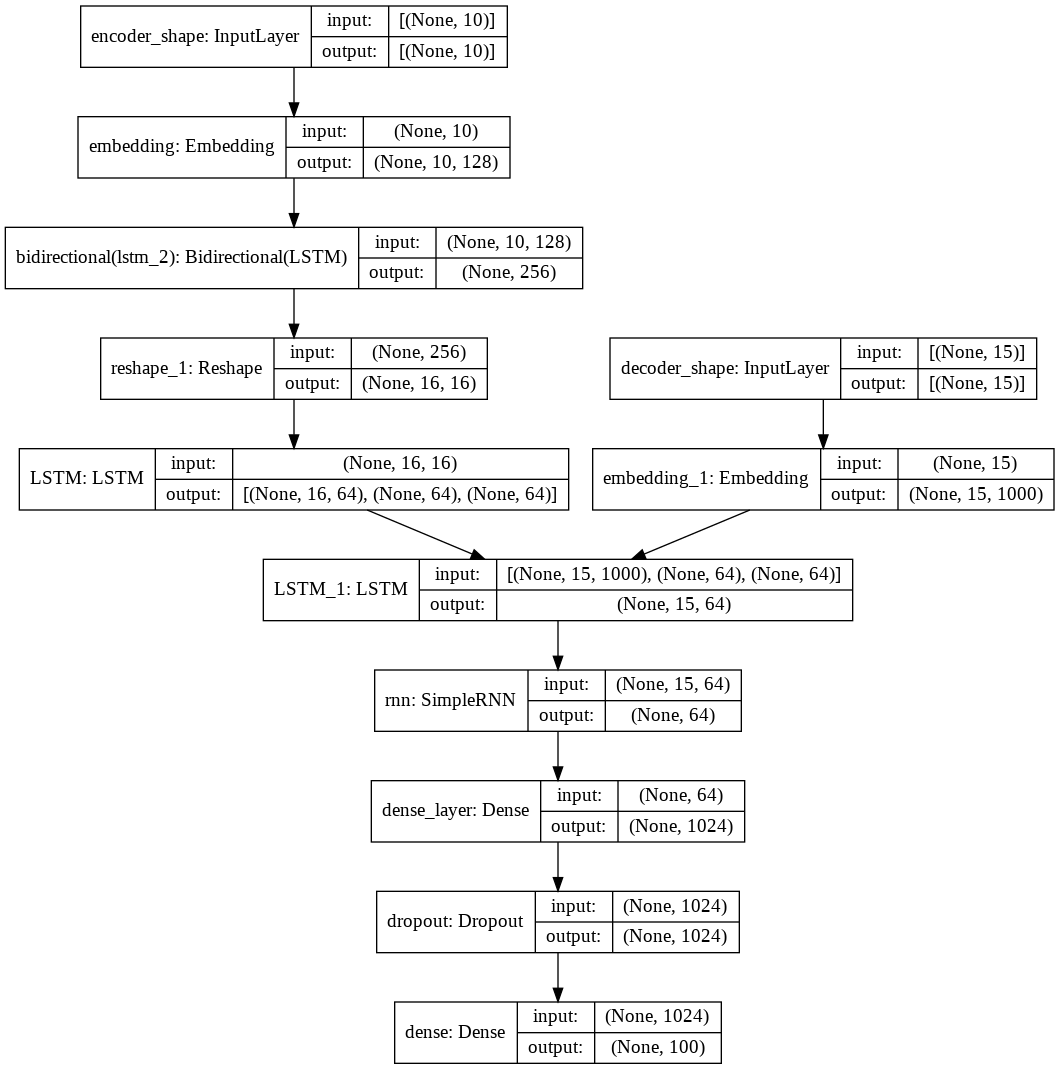

In [13]:
model.summary()
tf.keras.utils.plot_model(model = model, to_file = 'BRNN.png', show_shapes = True)

In [14]:
#The CuDNN kernels to speedup training of RNN

In [15]:
#Application of CuDNN with mnist dataset.
#We assume each sequence to be of dimension (28,28) for the cifar10 image is (28,28,1)


In [16]:
def build_myCuDNN(CuDNN_kernel_use = True):
  if CuDNN_kernel_use:
    my_lstm = tf.keras.layers.LSTM(units = 128,return_sequences = False,kernel_initializer = 'random_normal',dropout = 0.5,recurrent_dropout = 0.25, name = 'lstm_with_CuDNN', input_shape = (None, 28))
  else:
    my_lstm = tf.keras.layers.RNN(tf.keras.layers.LSTMCell(units = 128,return_sequences = False,kernel_initializer = 'random_normal',dropout = 0.5,recurrent_dropout = 0.25),input_shape = (None,28))
  model = tf.keras.Sequential([
                               my_lstm,
                               tf.keras.layers.BatchNormalization(name = 'Batch_Norm'),
                               tf.keras.layers.Dense(units = 1024, activation = 'relu', name = 'dense_layer', 
                              kernel_initializer = 'random_normal'),
                              tf.keras.layers.Dropout(rate = 0.5, name = 'dropout'),
                              tf.keras.layers.Dense(units = 10, activation = 'softmax', name = 'outputs')])
  return model
      

In [17]:
model = build_myCuDNN(CuDNN_kernel_use=True)

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_with_CuDNN (LSTM)       (None, 128)               80384     
_________________________________________________________________
Batch_Norm (BatchNormalizati (None, 128)               512       
_________________________________________________________________
dense_layer (Dense)          (None, 1024)              132096    
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
outputs (Dense)              (None, 10)                10250     
Total params: 223,242
Trainable params: 222,986
Non-trainable params: 256
_________________________________________________________________


In [19]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [20]:
x_train, x_test = x_train.astype('float32')/255.0, x_test.astype('float32')/255.0
y_train = tf.keras.utils.to_categorical(y_train, num_classes = 10)

In [21]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'Adam', metrics = ['accuracy'])

In [22]:
model.fit(x_train, y_train,validation_split= 0.20, verbose = 2, epochs = 5)

Epoch 1/5
1500/1500 - 61s - loss: 0.5230 - accuracy: 0.8282 - val_loss: 0.1387 - val_accuracy: 0.9548
Epoch 2/5
1500/1500 - 58s - loss: 0.2233 - accuracy: 0.9316 - val_loss: 0.0960 - val_accuracy: 0.9712
Epoch 3/5
1500/1500 - 58s - loss: 0.1648 - accuracy: 0.9496 - val_loss: 0.0738 - val_accuracy: 0.9791
Epoch 4/5
1500/1500 - 58s - loss: 0.1374 - accuracy: 0.9594 - val_loss: 0.0591 - val_accuracy: 0.9833
Epoch 5/5
1500/1500 - 59s - loss: 0.1129 - accuracy: 0.9660 - val_loss: 0.0609 - val_accuracy: 0.9835
